In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv (r'C:\Users\HP\Downloads\Copy of HINDALCO_1D.csv')   
df = pd.DataFrame(data, columns= ['datetime','close','high','low','open','volume','instrument'])

In [3]:
from pathlib import Path
Path('my_data.db').touch()

In [4]:
import sqlite3
conn = sqlite3.connect('my_data.db')
c = conn.cursor()

In [5]:
 users = pd.read_csv(r'C:\Users\HP\Downloads\Copy of HINDALCO_1D.csv')
# write the data to a sqlite table
users.to_sql('users', conn, if_exists='append', index = False)

In [6]:
c.execute('''SELECT * FROM users''').fetchall()

[('2014-01-24 00:00:00', 114, 115.35, 113, 113.15, 5737135, 'HINDALCO'),
 ('2014-01-27 00:00:00', 111.1, 112.7, 109.3, 112, 8724577, 'HINDALCO'),
 ('2014-01-28 00:00:00', 113.8, 115, 109.75, 110, 4513345, 'HINDALCO'),
 ('2014-01-29 00:00:00', 111.75, 114.75, 111.15, 114.5, 4713458, 'HINDALCO'),
 ('2014-01-30 00:00:00', 108.1, 110.7, 107.6, 110.2, 5077231, 'HINDALCO'),
 ('2014-01-31 00:00:00', 109.55, 110, 107, 109.05, 8287236, 'HINDALCO'),
 ('2014-02-03 00:00:00', 103.45, 109.4, 103, 109, 5572627, 'HINDALCO'),
 ('2014-02-04 00:00:00', 102.45, 103.45, 99.8, 102, 13935173, 'HINDALCO'),
 ('2014-02-05 00:00:00', 104.25, 105.15, 101, 102.4, 9106760, 'HINDALCO'),
 ('2014-02-06 00:00:00', 105.75, 106.5, 103.1, 104.65, 10194884, 'HINDALCO'),
 ('2014-02-07 00:00:00', 106.4, 107.7, 104.75, 106.15, 9650511, 'HINDALCO'),
 ('2014-02-10 00:00:00', 106.8, 107.7, 105.8, 106.45, 3124538, 'HINDALCO'),
 ('2014-02-11 00:00:00', 104.55, 107.1, 104.25, 106.9, 3964390, 'HINDALCO'),
 ('2014-02-12 00:00:00', 1

In [7]:
pd.read_sql('''SELECT * FROM users''', conn)

,datetime,close,high,low,open,volume,instrument
0,2014-01-24 00:00:00,114.00,115.35,113.00,113.15,5737135,HINDALCO
1,2014-01-27 00:00:00,111.10,112.70,109.30,112.00,8724577,HINDALCO
2,2014-01-28 00:00:00,113.80,115.00,109.75,110.00,4513345,HINDALCO
3,2014-01-29 00:00:00,111.75,114.75,111.15,114.50,4713458,HINDALCO
4,2014-01-30 00:00:00,108.10,110.70,107.60,110.20,5077231,HINDALCO
...,...,...,...,...,...,...,...
4855,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO
4856,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO
4857,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO
4858,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO


In [8]:
from datetime import datetime
df["new_date"] = df["datetime"].apply(lambda x: \
    datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))


In [9]:
df=df.set_index(df['new_date'].values)

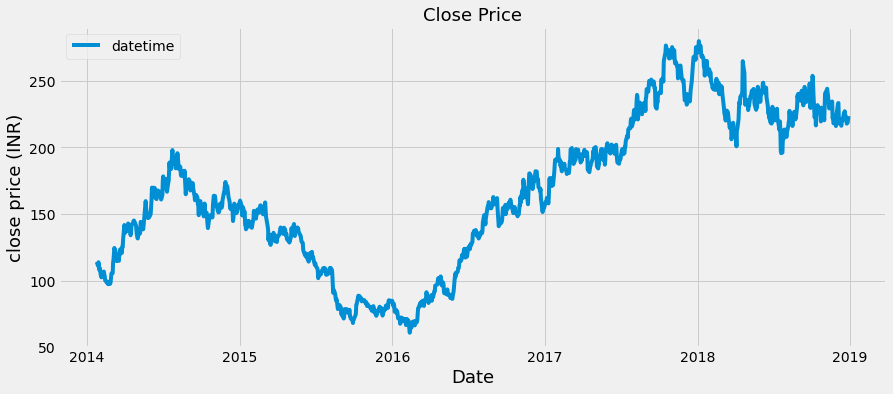

In [10]:
plt.figure(figsize=(13.2, 5.5))
plt.title('Close Price', fontsize=18)
plt.plot(df['close'], label='close price')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('close price (INR)', fontsize=18)
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [11]:
typical_price = (df['close'] + df['high'] + df['low']) / 3
typical_price

2014-01-24    114.116667
2014-01-27    111.033333
2014-01-28    112.850000
2014-01-29    112.550000
2014-01-30    108.800000
                 ...    
2018-12-21    224.416667
2018-12-24    219.600000
2018-12-26    217.100000
2018-12-27    221.366667
2018-12-28    223.516667
Length: 1215, dtype: float64

In [12]:
#Get the period
period = 14

# MONEYFLOW

In [14]:
money_flow = typical_price * df['volume']
money_flow

2014-01-24    6.547027e+08
2014-01-27    9.687189e+08
2014-01-28    5.093310e+08
2014-01-29    5.304997e+08
2014-01-30    5.524027e+08
                  ...     
2018-12-21    1.556036e+09
2018-12-24    1.024878e+09
2018-12-26    1.423061e+09
2018-12-27    1.759233e+09
2018-12-28    1.134329e+09
Length: 1215, dtype: float64

# positive and negative money flow

In [17]:
negative_flow= []
positive_flow= []

for i in range(1, len(typical_price)):
    if typical_price[i] > typical_price[i-1]:
        positive_flow.append(money_flow[i-1])
        negative_flow.append(0)
    elif typical_price[i] < typical_price[i-1]:
        negative_flow.append(money_flow[i-1])
        positive_flow.append(0)
    else:
        positive_flow.append(0)
        negative_flow.append(0)
        
        

In [18]:
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
    positive_mf.append(sum(positive_flow[i+1- period : i+1]) )
for i in range(period-1, len(negative_flow)):
    negative_mf.append(sum(negative_flow[i+1-period : i+1]) )
    
    


# MONEY FLOW INDEX 

In [19]:
mfi = 100* (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
mfi

array([57.1269834 , 53.88666274, 46.55222767, ..., 50.12884627,
       59.88561024, 57.66063786])

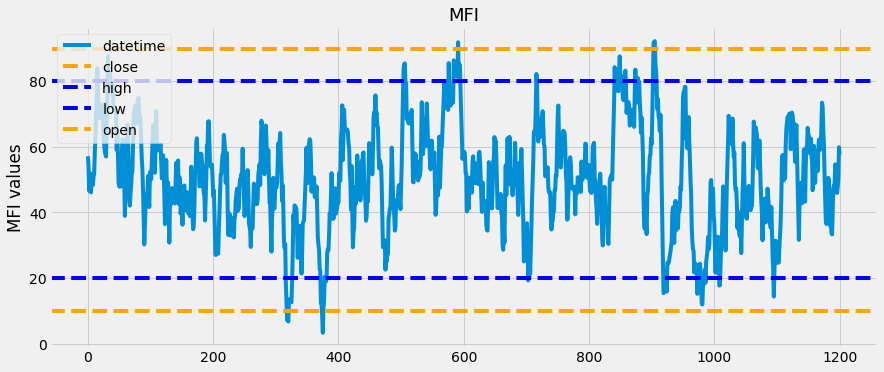

In [21]:
df2 = pd.DataFrame()
df2['MFI'] =mfi
#create the plot
plt.figure(figsize=(13.2, 5.5))
plt.title('MFI', fontsize=18)
plt.plot(df2['MFI'], label='MFI')
plt.axhline(10, linestyle='--',color='orange')
plt.axhline(20, linestyle='--',color='blue')
plt.axhline(80,linestyle='--',color='blue')
plt.axhline(90, linestyle='--',color='orange')
plt.ylabel('MFI values')
plt.legend(df.columns.values, loc='upper left')
plt.show()

In [22]:
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi
new_df

,datetime,close,high,low,open,volume,instrument,new_date,MFI
2014-02-13,2014-02-13 00:00:00,100.20,104.55,99.75,103.90,12652556,HINDALCO,2014-02-13,57.126983
2014-02-14,2014-02-14 00:00:00,99.90,101.00,97.85,100.75,6390793,HINDALCO,2014-02-14,53.886663
2014-02-17,2014-02-17 00:00:00,98.50,100.75,97.65,100.00,6870442,HINDALCO,2014-02-17,46.552228
2014-02-18,2014-02-18 00:00:00,99.30,100.50,97.75,98.70,8475360,HINDALCO,2014-02-18,52.042959
2014-02-19,2014-02-19 00:00:00,98.85,100.10,98.40,99.60,4582897,HINDALCO,2014-02-19,50.607985
...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,2018-12-21,45.958435
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,2018-12-24,47.770279
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,2018-12-26,50.128846
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,2018-12-27,59.885610


# BUY AND SELL SIGNALS

In [23]:
def get_signal(data, high, low):
    buy_signal = []
    sell_signal = []
    
    for i in range(len(data['MFI'])):
        if data['MFI'][i] > high:
            buy_signal.append(np.nan)
            sell_signal.append(data['close'][i])
        elif data['MFI'][i] < low:
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
            
    return (buy_signal, sell_signal)    
    

In [24]:
new_df['Buy'] = get_signal(new_df, 80, 20)[0]
new_df['Sell'] = get_signal(new_df, 80, 20)[1]
new_df

,datetime,close,high,low,open,volume,instrument,new_date,MFI,Buy,Sell
2014-02-13,2014-02-13 00:00:00,100.20,104.55,99.75,103.90,12652556,HINDALCO,2014-02-13,57.126983,NaN,NaN
2014-02-14,2014-02-14 00:00:00,99.90,101.00,97.85,100.75,6390793,HINDALCO,2014-02-14,53.886663,NaN,NaN
2014-02-17,2014-02-17 00:00:00,98.50,100.75,97.65,100.00,6870442,HINDALCO,2014-02-17,46.552228,NaN,NaN
2014-02-18,2014-02-18 00:00:00,99.30,100.50,97.75,98.70,8475360,HINDALCO,2014-02-18,52.042959,NaN,NaN
2014-02-19,2014-02-19 00:00:00,98.85,100.10,98.40,99.60,4582897,HINDALCO,2014-02-19,50.607985,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2018-12-21,2018-12-21 00:00:00,224.00,227.45,221.80,224.25,6933691,HINDALCO,2018-12-21,45.958435,NaN,NaN
2018-12-24,2018-12-24 00:00:00,217.85,224.00,216.95,224.00,4667022,HINDALCO,2018-12-24,47.770279,NaN,NaN
2018-12-26,2018-12-26 00:00:00,218.60,219.80,212.90,213.85,6554865,HINDALCO,2018-12-26,50.128846,NaN,NaN
2018-12-27,2018-12-27 00:00:00,220.60,223.90,219.60,221.40,7947144,HINDALCO,2018-12-27,59.885610,NaN,NaN


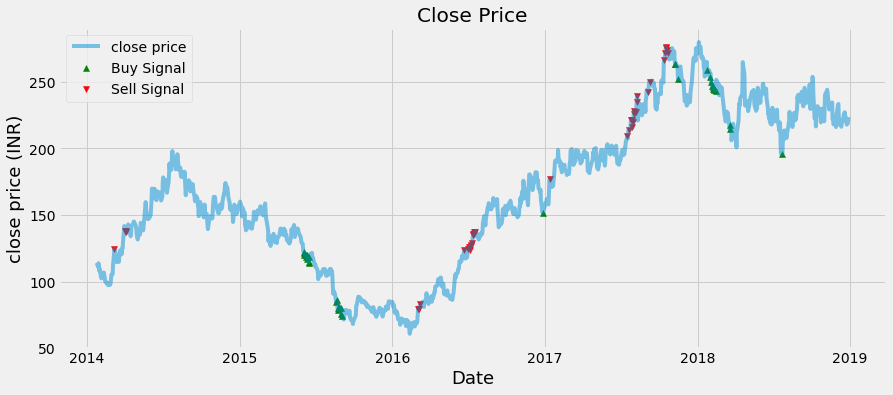

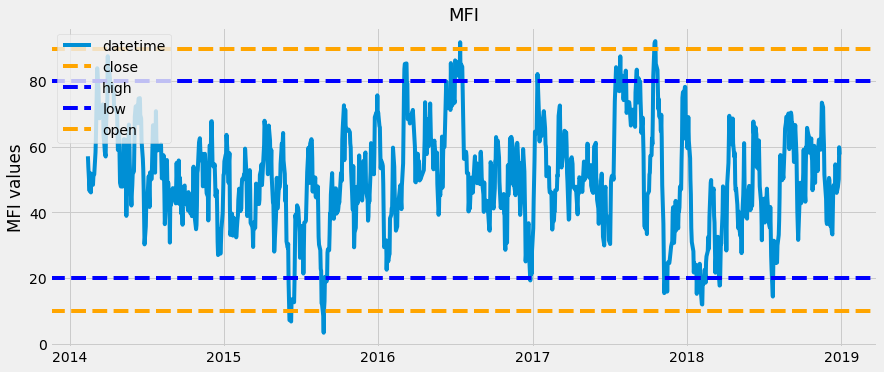

In [27]:
plt.figure(figsize=(13.2, 5.5))
plt.title('Close Price')
plt.plot(df['close'], label='close price', alpha = 0.5)
plt.scatter(new_df.index, new_df['Buy'], color='green', label='Buy Signal', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color='red', label='Sell Signal', marker='v', alpha=1)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('close price (INR)', fontsize=18)
plt.legend(loc='upper left')
plt.show()
#plot
plt.figure(figsize=(13.2, 5.5))
plt.title('MFI', fontsize=18)
plt.plot(new_df['MFI'], label='MFI')
plt.axhline(10, linestyle='--',color='orange')
plt.axhline(20, linestyle='--',color='blue')
plt.axhline(80,linestyle='--',color='blue')
plt.axhline(90, linestyle='--',color='orange')
plt.ylabel('MFI values')
plt.legend(df.columns.values, loc='upper left')
plt.show()